# Erkennt man Fensteröffnungen an Druckunterschieden

Daten stammen aus Raum 4A-027. erste Auswertungen aus 10 min Daten. Es liegen auf höher aufgelöste Daten vor (1min). Ggfs. müsste man nochmal versuche Fahren und noch höher aufgelöste Daten erfassen.

Können wir zuverlässig den Fensterzustand im Raum ohne Fensterkontakte erfassen? Wenn das auf andere Räume übertragbar wäre, dann könnte man sich viele Sensoren sparen. (Klassifikationsproblem).

In [32]:
# Einlesen der Daten
import pandas as pd

df = pd.read_csv("data/df_eval.csv", sep = ";")
df.columns

Index(['Unnamed: 0', 'Time', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'S10_CO2',
       'S07_CO2', 'S20_CO2', 'S17_CO2', 'S12_CO2', 'S14_CO2',
       ...
       'avg_Pressure_4A-027', 'avg_Pressure_4B-005', 'std_Pressure_4A-027',
       'std_Pressure_4B-005', 'avg_Temperature_4A-027',
       'avg_Temperature_4B-005', 'std_Temperature_4A-027',
       'std_Temperature_4B-005', 'der_CO2_4A-027', 'der_CO2_4B-005'],
      dtype='object', length=137)

In [33]:
# Nur Druck und Fenster Daten behalten
df_simple = df[["avg_Pressure_4A-027", "avg_Temperature_4A-027","K02","K08","K07"]]

In [34]:
# Änderungen ermitteln
df_simple["avg_Pressure_4A_diff"] = df_simple["avg_Pressure_4A-027"].diff()
df_simple["avg_Temperature_4A_diff"] = df_simple["avg_Temperature_4A-027"].diff()
df_simple["K02_diff"] = df_simple["K02"].diff()
df_simple["K08_diff"] = df_simple["K08"].diff()
df_simple["K07_diff"] = df_simple["K07"].diff()


<ipython-input-34-189df3d29177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple["avg_Pressure_4A_diff"] = df_simple["avg_Pressure_4A-027"].diff()
<ipython-input-34-189df3d29177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple["avg_Temperature_4A_diff"] = df_simple["avg_Temperature_4A-027"].diff()
<ipython-input-34-189df3d29177>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

## Wenn Tür (K02)

- Auf (1) fällt der Druck etwas

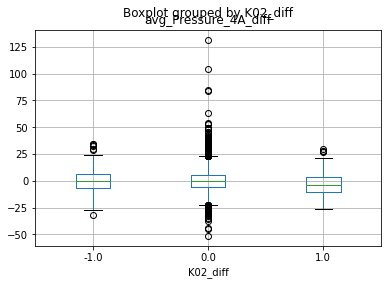

In [35]:
boxplot = df_simple.boxplot(column = "avg_Pressure_4A_diff", by='K02_diff')

## Wenn Fenster 1

- Auf (1) fällt der Druck etwas
- Aber auch wenn Fenster zu (-1)

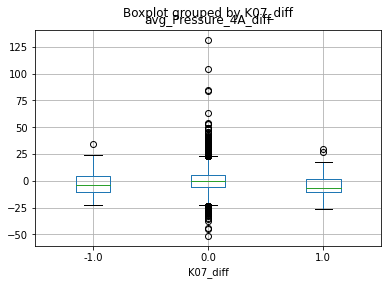

In [36]:
boxplot = df_simple.boxplot(column = "avg_Pressure_4A_diff", by='K07_diff')

## Wenn Fenster 2

- Auf (1) fällt der Druck etwas
- Aber auch wenn Fenster zu (-1)

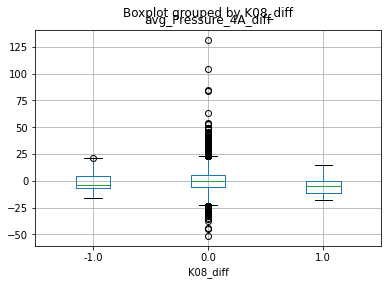

In [31]:
boxplot = df_simple.boxplot(column = "avg_Pressure_4A_diff", by='K08_diff')

## Kontrolle für Temperatur

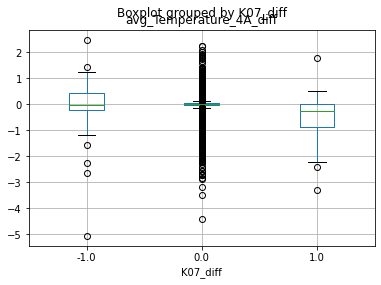

In [39]:
boxplot = df_simple.boxplot(column = "avg_Temperature_4A_diff", by='K07_diff')